#### EDA (Exploratory Data Anlaysis , 탐색적 데이터 분석)

In [12]:
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm     #폰트
from matplotlib import font_manager,rc   # 폰트
import seaborn as sns   # 히트맵

In [2]:
test = pd.read_csv("movies_test.csv", encoding = 'euc-kr')
train = pd.read_csv("movies_train.csv",encoding = 'euc-kr')
submission = pd.read_csv("submission.csv",encoding = 'euc-kr')

In [9]:
pd.options.display.float_format = '{:.1f}'.format  # 소수점 정리해 주는거.

In [14]:
# 한글폰트

if platform.system()=='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font',family=font_name)

In [15]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [17]:
train.count()   # 다 600개인데 dir_prev_bfnum만 273개라서 결측치를 어떻게 처리할지 고민

title             600
distributor       600
genre             600
release_time      600
time              600
screening_rat     600
director          600
dir_prev_bfnum    270
dir_prev_num      600
num_staff         600
num_actor         600
box_off_num       600
dtype: int64

In [18]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [19]:
train['release_time'].unique()

array(['2012-11-22', '2015-11-19', '2013-06-05', '2012-07-12',
       '2010-11-04', '2012-10-25', '2013-05-23', '2012-10-11',
       '2014-09-18', '2012-03-15', '2015-07-27', '2015-07-30',
       '2012-03-22', '2013-09-25', '2014-09-04', '2011-05-04',
       '2012-04-05', '2014-11-13', '2010-05-05', '2014-09-03',
       '2015-08-13', '2014-02-13', '2014-11-27', '2015-09-10',
       '2010-02-18', '2010-03-18', '2013-08-29', '2011-03-24',
       '2011-07-07', '2015-04-30', '2011-12-08', '2011-12-01',
       '2015-06-04', '2014-07-03', '2014-05-22', '2012-02-29',
       '2010-03-25', '2013-04-04', '2010-04-22', '2014-03-27',
       '2010-10-28', '2013-05-30', '2010-01-14', '2015-12-03',
       '2014-11-26', '2014-08-07', '2014-10-16', '2015-01-07',
       '2010-07-29', '2014-10-02', '2012-01-05', '2015-05-21',
       '2015-04-23', '2010-07-01', '2013-11-14', '2014-12-31',
       '2013-11-21', '2012-05-10', '2012-09-20', '2014-07-09',
       '2015-11-25', '2011-09-29', '2015-01-29', '2015-

In [20]:
train['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [21]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [22]:
train['year']= train['release_time'].str.slice(0,4).astype(int)

In [23]:
train['month'] = train['release_time'].str.slice(5,7).astype(int)

In [24]:
train.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,nan,0,91,2,23398,2012,11
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.0,2,262,4,233211,2012,10
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,nan,0,32,5,53526,2013,5
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,739522.0,3,342,2,1110523,2012,10
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,nan,0,3,5,4778,2014,9
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,nan,0,138,3,868,2012,3


In [25]:
train['director'].count()
train['genre'].unique()
train['genre'].value_counts()

train['distributor'].unique()
train['distributor'].value_counts().tail(10)

train['screening_rat'].unique()

array(['청소년 관람불가', '15세 관람가', '전체 관람가', '12세 관람가'], dtype=object)

In [26]:
pd.reset_option('display.float_format')

In [27]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.062575,-0.023969
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,-0.002137,0.064117
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.132621,0.034019
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,-0.032891,-0.002841
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,-0.098869,-0.015063
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.002497,0.019104
year,-0.062575,-0.002137,0.132621,-0.032891,-0.098869,-0.002497,1.000000,0.046627
month,-0.023969,0.064117,0.034019,-0.002841,-0.015063,0.019104,0.046627,1.000000


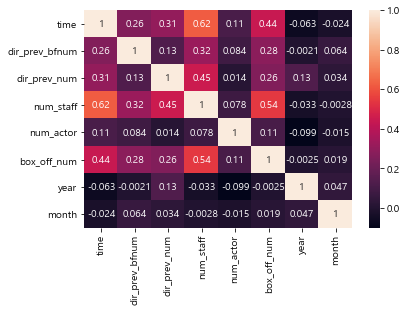

In [28]:
sns.heatmap(train.corr(), annot = True)

In [29]:
train['genre'].value_counts()
train['year'].value_counts()

2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: year, dtype: int64

In [30]:
# 등급과 관객수
train.groupby('screening_rat')['box_off_num'].agg([np.sum,np.mean]).sort_values(by= ["sum"], ascending=False)  

,sum,mean
screening_rat,,
15세 관람가,251998766,1.247519e+06
12세 관람가,86188052,8.449809e+05
청소년 관람불가,74292991,3.641813e+05
전체 관람가,12429242,1.351005e+05


In [31]:
# 배급사별 관객수
train_distributor_box_off_num = train.groupby('distributor')['box_off_num'].agg([np.sum,np.mean])
train_distributor_box_off_num.sort_values(by= ["sum"], ascending=False)  

,sum,mean
distributor,,
CJ 엔터테인먼트,116788093,2.162742e+06
(주)쇼박스,88053064,3.386656e+06
(주)NEW,65532145,2.184405e+06
롯데엔터테인먼트,64383745,1.238149e+06
CJ E&M Pictures,8244674,4.122337e+06
...,...,...
나우콘텐츠,54,5.400000e+01
위드시네마,46,4.600000e+01
사람과 사람들,42,4.200000e+01


In [32]:
# 등급별 정보
train.groupby('screening_rat').mean()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
screening_rat,,,,,,,,
12세 관람가,101.549020,1.382217e+06,0.931373,173.235294,3.607843,8.449809e+05,2012.666667,7.333333
15세 관람가,106.935644,1.130408e+06,1.202970,208.396040,3.930693,1.247519e+06,2012.574257,6.767327
전체 관람가,89.847826,3.542507e+05,0.413043,44.652174,3.804348,1.351005e+05,2012.478261,7.010870
청소년 관람불가,99.475490,9.747891e+05,0.735294,131.357843,3.490196,3.641813e+05,2013.083333,7.093137


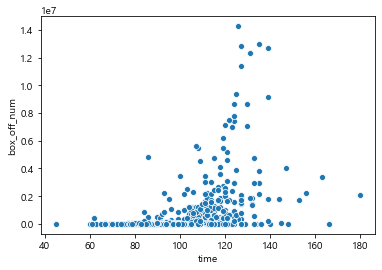

In [33]:
# 시간과 관객수 상관관계
sns.scatterplot(x = "time" , y ="box_off_num" , data=train)

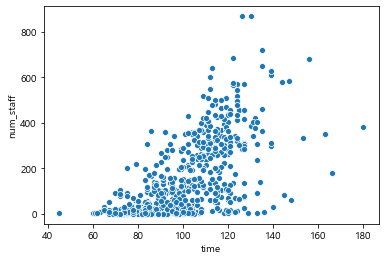

In [34]:
# 시간과 스탭수의 상관관계
sns.scatterplot(x = "time" , y ="num_staff" , data=train)

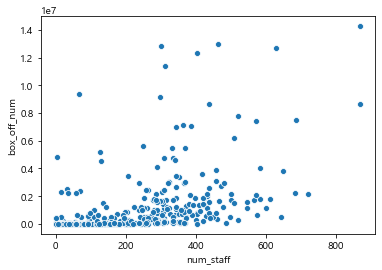

In [35]:
# 스탭수와 관객수의 상관관계
sns.scatterplot(x = "num_staff" , y ="box_off_num" , data=train)

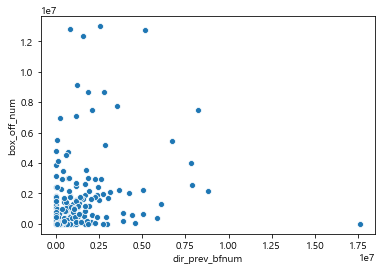

In [40]:
# 이전 영화 관객의 평균수와 영화관람객 수 시각화
sns.scatterplot(x = "dir_prev_bfnum" , y ="box_off_num" , data=train)

Text(0, 0.5, 'Total')

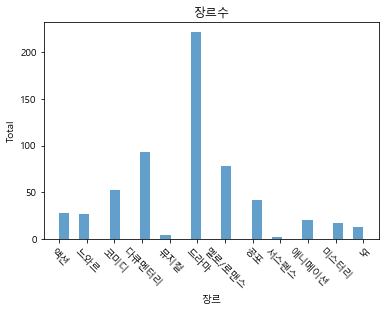

In [36]:
# 장르별 갯수 시각화

fig=plt.figure()
ax=fig.add_subplot(1,1,1) # 111 : 1x1그리드에 첫 번째 subplot

plt.xticks(rotation =-45)
ax.hist(train['genre'],bins=30,alpha=0.7)
ax.set_title('장르수')
ax.set_xlabel('장르')
ax.set_ylabel('Total')

Text(0, 0.5, 'Total')

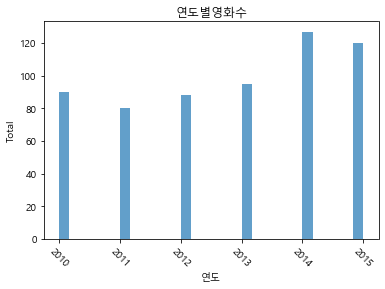

In [37]:
#연도별 영화갯수 시각화

fig=plt.figure()
ax=fig.add_subplot(1,1,1) # 111 : 1x1그리드에 첫 번째 subplot

plt.xticks(rotation =-45)
ax.hist(train['year'],bins=30,alpha=0.7)
ax.set_title('연도별영화수')
ax.set_xlabel('연도')
ax.set_ylabel('Total')

In [38]:
# 연도별 관객수 합, 연도별 관객수 평균

train_year_box_off_num = train.groupby('year')['box_off_num'].agg([np.sum,np.mean])
train_year_box_off_num
train_year_box_off_num.reset_index(inplace = True)
train_year_box_off_num

,year,sum,mean
0,2010,48749235,5.416582e+05
1,2011,50309371,6.288671e+05
2,2012,83223817,9.457252e+05
3,2013,95698992,1.007358e+06
4,2014,75423331,5.938845e+05
5,2015,71504305,5.958692e+05


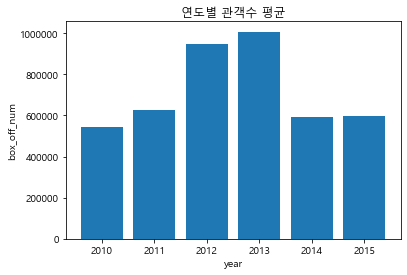

In [39]:
# 연도별 관객수 합, 연도별 관객수 평균 시각화

plt.bar(train_year_box_off_num['year'],train_year_box_off_num['mean'])
plt.xlabel('year')
plt.ylabel('box_off_num')
plt.title('연도별 관객수 평균')
plt.show()

In [44]:
# 월별 관객수 합, 연도별 관객수 평균

train_month_box_off_num = train.groupby('month')['box_off_num'].agg([np.sum,np.mean])
train_month_box_off_num
train_month_box_off_num.reset_index(inplace = True)
train_month_box_off_num

,month,sum,mean
0,1,53271292,1.365931e+06
1,2,20553781,6.630252e+05
2,3,14242143,2.738874e+05
3,4,12133835,2.581667e+05
4,5,32814059,5.756852e+05
5,6,14856308,5.122865e+05
6,7,54576555,1.113807e+06
7,8,56603892,1.029162e+06
8,9,43891718,7.315286e+05
9,10,23154249,3.859042e+05


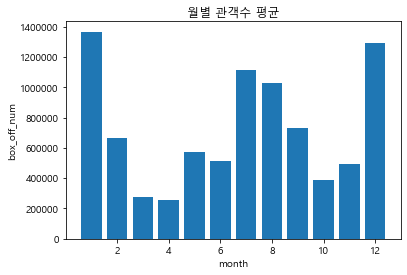

In [45]:
# 월별 관객수 평균
plt.bar(train_month_box_off_num['month'],train_month_box_off_num['mean'])
plt.xlabel('month')
plt.ylabel('box_off_num')
plt.title('월별 관객수 평균')
plt.show()

In [47]:
train_year_genre = train.groupby(['year','genre'])[['box_off_num']].sum()
train_year_genre.reset_index(inplace = True)
train_year_genre

,year,genre,box_off_num
0,2010,SF,2130645
1,2010,공포,5720366
2,2010,느와르,8175580
3,2010,다큐멘터리,660481
4,2010,드라마,10079903
...,...,...,...
59,2015,뮤지컬,862
60,2015,미스터리,5801847
61,2015,애니메이션,807764
62,2015,액션,17882814


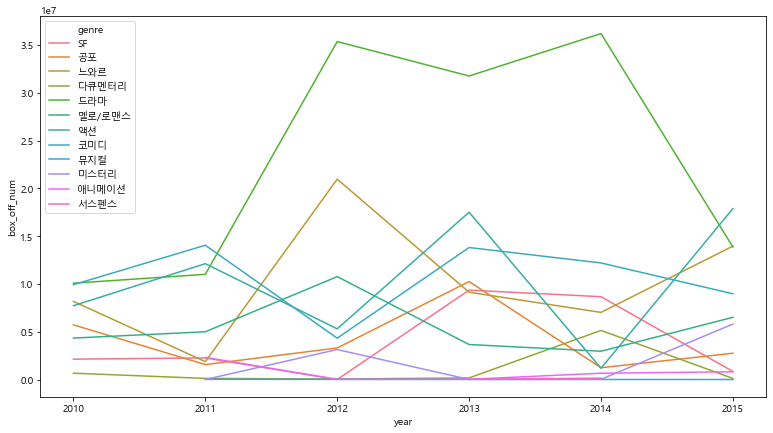

In [49]:
plt.figure(figsize=(13,7))
sns.lineplot(x="year", y="box_off_num", data=train_year_genre, hue="genre")

In [51]:
train_screening_rat_genre = train.groupby(['screening_rat','genre'])[['box_off_num']].sum()
train_screening_rat_genre.reset_index(inplace = True)
train_screening_rat_genre

,screening_rat,genre,box_off_num
0,12세 관람가,SF,8671086
1,12세 관람가,공포,1079
2,12세 관람가,다큐멘터리,361295
3,12세 관람가,드라마,44085238
4,12세 관람가,멜로/로맨스,13555789
5,12세 관람가,뮤지컬,3089
6,12세 관람가,애니메이션,39560
7,12세 관람가,액션,609063
8,12세 관람가,코미디,18861853
9,15세 관람가,SF,14561678


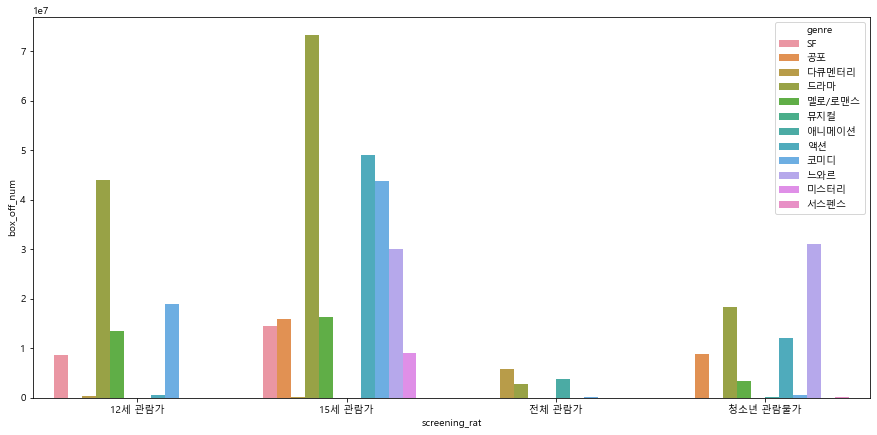

In [52]:
plt.figure(figsize=(15,7))
sns.barplot(x="screening_rat", y="box_off_num", data=train_screening_rat_genre, hue="genre")

Text(0.5, 1.0, '장르에 따른 관객수')

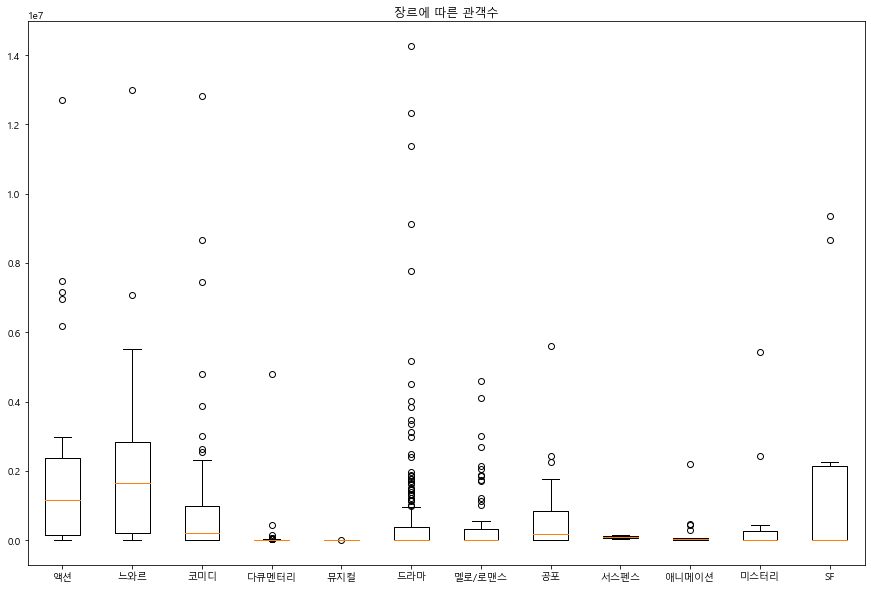

In [161]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)


ax.boxplot([train[train['genre']=='액션']['box_off_num'], 
            train[train['genre']=='느와르']['box_off_num'],
            train[train['genre']=='코미디']['box_off_num'],
            train[train['genre']=='다큐멘터리']['box_off_num'],
            train[train['genre']=='뮤지컬']['box_off_num'],
            train[train['genre']=='드라마']['box_off_num'],
            train[train['genre']=='멜로/로맨스']['box_off_num'],
            train[train['genre']=='공포']['box_off_num'],
            train[train['genre']=='서스펜스']['box_off_num'],
            train[train['genre']=='애니메이션']['box_off_num'],
            train[train['genre']=='미스터리']['box_off_num'],
            train[train['genre']=='SF']['box_off_num']],
            labels = ['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
                      '애니메이션', '미스터리', 'SF'])
ax.set_title('장르에 따른 관객수')

C:\Users\ZENBOOK\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\Users\ZENBOOK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ZENBOOK\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


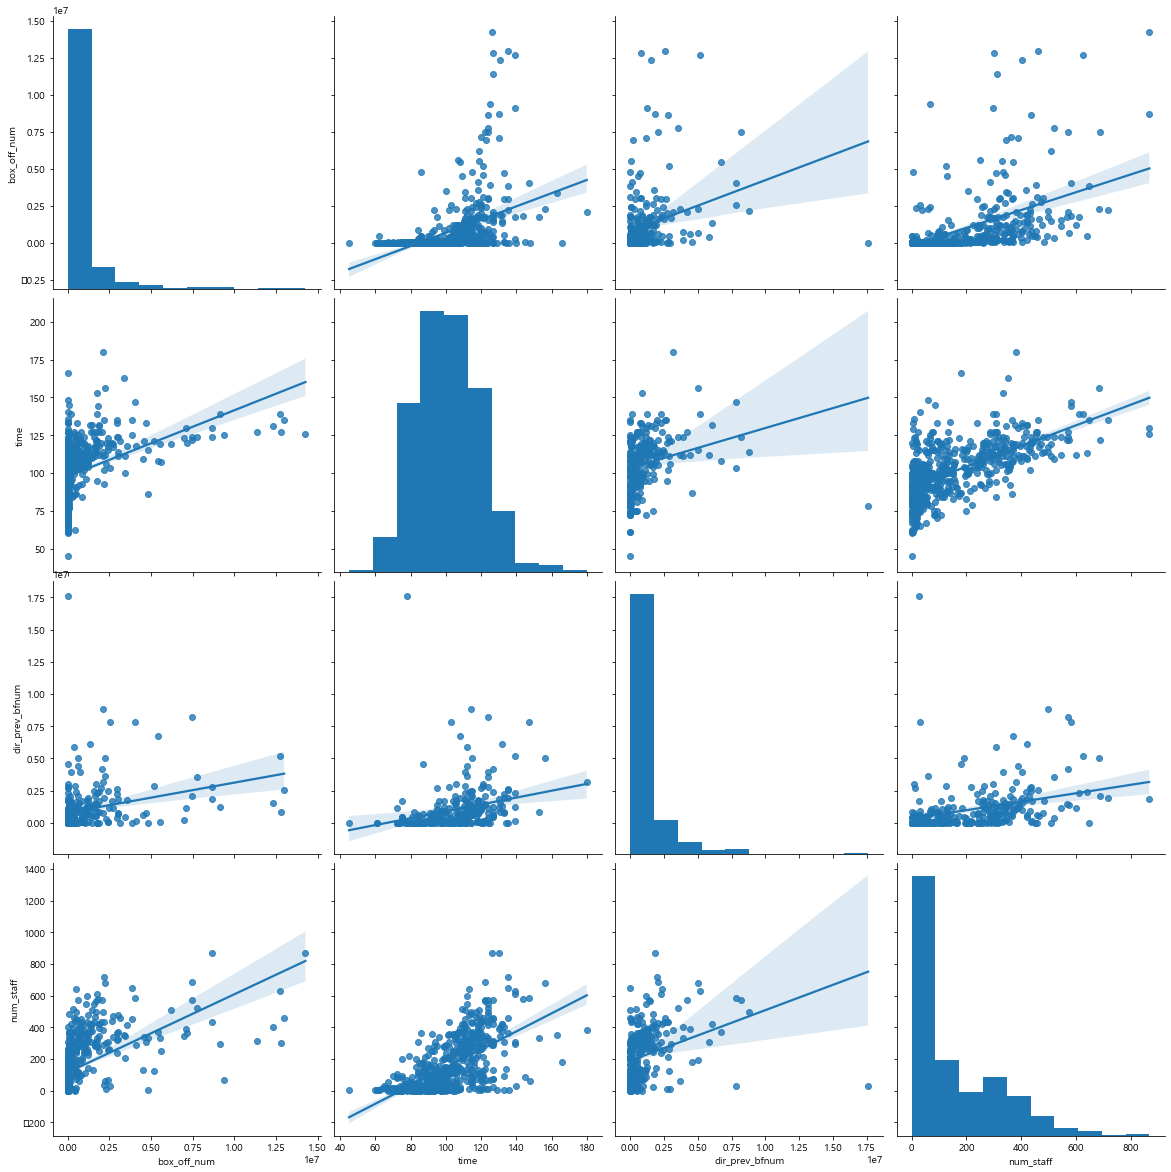

In [162]:
sns.pairplot(train,vars=['box_off_num','time','dir_prev_bfnum','num_staff'],size=4,kind='reg', palette="husl")

In [ ]:
######## 판다스 정리 https://blog.naver.com/o12486vs2/221892826519

In [134]:
### 그래프정리  https://blog.naver.com/jhnyang/221401721741

In [ ]:
# 꺽은선그래프  https://blog.naver.com/heygun/221511891733

In [55]:

data = {
    "2010": [train[train['year']==2010]['box_off_num'].sum(),train[train['year']==2010]['box_off_num'].mean()],
    "2011": [train[train['year']==2011]['box_off_num'].sum(),train[train['year']==2011]['box_off_num'].mean()],
    "2012": [train[train['year']==2012]['box_off_num'].sum(),train[train['year']==2012]['box_off_num'].mean()],
    "2013": [train[train['year']==2013]['box_off_num'].sum(),train[train['year']==2013]['box_off_num'].mean()],
    "2014": [train[train['year']==2014]['box_off_num'].sum(),train[train['year']==2014]['box_off_num'].mean()],
    "2015": [train[train['year']==2015]['box_off_num'].sum(),train[train['year']==2015]['box_off_num'].mean()]
}
print(type(data))
print(data)

<class 'dict'>
{'2010': [48749235, 541658.1666666666], '2011': [50309371, 628867.1375], '2012': [83223817, 945725.1931818182], '2013': [95698992, 1007357.8105263158], '2014': [75423331, 593884.4960629921], '2015': [71504305, 595869.2083333334]}


In [57]:
df=pd.DataFrame(data)
df.T

,0,1
2010,48749235.0,541658.2
2011,50309371.0,628867.1
2012,83223817.0,945725.2
2013,95698992.0,1007357.8
2014,75423331.0,593884.5
2015,71504305.0,595869.2


In [ ]:
# 시각화 https://blog.naver.com/zxcvb8842/221948298213

In [30]:

# train[['genre','year']].groupby('genre').count().sort_values('year')
train.groupby(by='genre').sum()

https://blog.naver.com/pear_one/221977850114
https://blog.naver.com/bosongmoon/221735099292


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
genre,,,,,,,,
SF,1318,16096836.7,17,2565,48,23248494,26169,89
공포,4209,22674514.0,46,7408,163,24814966,84540,305
느와르,3115,20922763.3,35,8399,97,61119768,54347,175
다큐멘터리,8189,4299732.3,37,1660,304,6247020,187181,650
드라마,23128,81189587.3,180,36351,806,138277444,444787,1545
멜로/로맨스,7538,48035233.2,77,10591,266,33225507,157018,540
뮤지컬,535,0.0,0,11,14,33135,10064,46
미스터리,1744,9927827.4,21,1995,49,8968319,34226,127
서스펜스,224,534232.5,2,222,6,165222,4027,13


In [ ]:
# 시계열
https://cyan91.tistory.com/36 

In [ ]:
# 데이터프레임조건
https://blog.naver.com/0to1000/222019025575